<a href="https://colab.research.google.com/github/ksyed99/ML_assignments/blob/main/RegressionAssignmentp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
## Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#   
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex1data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


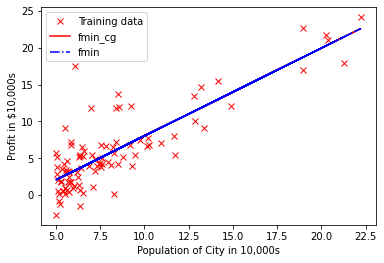

[-3.89582548  1.19303812]


In [43]:
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin_cg

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


args = (X,Y)  # parameter values
m=len(X)
al=1
lr2=[]
X = np.stack([np.ones(m), X], axis=1)
J = 0

#--------  COST FUNCTION-------------
def J(t,x,y):
  theta=t
  h = np.dot(X, theta)
  #============YOUR COST FUNCTION CODE HERE====
  total=0
  for i in range(m):
    squared_error=(h[i]-y[i])**2
    total=total +squared_error
    J= (1/(2*m))*total

  #=====================================
  lr2.append(J)
  return J


# -----------GRADIENT ONLY FUNCTION-----------
def gradf(t, *args):
  theta =t
  #===============GRADIENT ONLY CODE HERE
  h=np.dot(X,theta)
  theta=(1/m)*X.T.dot(h-Y)

 #======================================
  
  return theta

x0 = [0,0]  # Initial guess.
from scipy import optimize

res1 = optimize.fmin_cg(J, x0, fprime=gradf,args=args)
lr1=lr2
lr2=[]
res2 = optimize.fmin(J, x0, args=args)



plot(X[:,1],Y,'rx', X[:,1],np.dot(X, res1),'r', X[:,1], np.dot(X, res2),'b-.')
plt.ylabel('Profit in $10,000s'); # Set the y ? axis label
plt.xlabel('Population of City in 10,000s'); # Set the x ? axis label
plt.legend([ 'Training data','fmin_cg','fmin']);
plt.show()
print(res1)

No handles with labels found to put in legend.


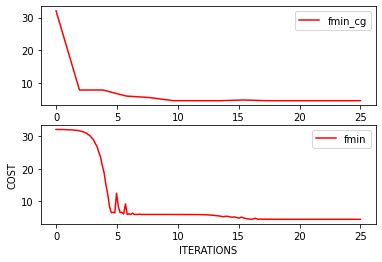

In [44]:
# plot learning rates of fmin and fmin_cg
xx = linspace(0,25,len(lr1))
xy = linspace(0,25,len(lr2))
plt.subplot(2,1,1)

plt.legend()   
plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin_cg
plt.legend()
plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label 
plt.legend() 
show()